>>Clasificador de Sentimientos (Like-Dislike) 
==
>>con Naive Bayes
===

<img src="imagenes/like-dislike.png" height="342" width="342">


Por Alexander Siavichay.

Una versión más actualizada de este documento, se puede encontrar en:
https://github.com/siavichay/NPL/blob/master/Clasificador_de_Sentimientos_(Like_Dislike)_Naive_Bayes.ipynb

Documento adaptado de Spmaclasifier (Bayesian_Inference).

Hoy en día, la web, y en especial las redes sociales, han crecido de manera exponencial.Con el pasar del tiempo aumenta la variedad de usos de los datos que fluyen en estos medios en diferentes ámbitos, como: el social, negocios, marketing, generador de noticias, diversión entre otros [Redes Sociales](https://www.investopedia.com/terms/s/social-networking.asp).

Es necesario conocer lo que los usuarios hacen al interactuar en estos medios, pero al ser millones, sería imposible hacer una estadística manual o realizar otras operaciones de minería de datos, big data, para conocer las opiniones sobre una publicación en particular. Sin el uso de la tecnología y técnicas como la bayesiana sería una tarea casi imposible.

Nota: Este algoritmo fue probado previamente para la clasificación de spam.

Hemos decidido tomar información real de comentarios de usuarios de diferentes sitios web.

La base de datos ha sido tomada del Paper 'From Group to Individual Labels using Deep Features' , Kotzias et. al,. KDD 2015.

Esta información está etiquetada como sentimientos positivo o negativo, extraídos de vista a productos, películas, y restaurantes.



Formato
=======
centencia \t puntuación \n


Detalles
=======
La puntuación es 1 (positivo) o 0 (negativo)

Las críticas se han tomado de sitios web:

imdb.com
amazon.com
yelp.com

La muestra corresponde a oraciones 500 positivas y 500 negativas. Estas muestras se han seleccionado de manera aleatoria.
Las oraciones son claramentes positivas o negativas, evitando opiniones neutrales.

La base de datos completa se puede seleccionar desde:

imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'.

amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'.

yelp: [Yelp dataset challenge] (http://www.yelp.com/dataset_challenge).


Nuestro objetivo es utilizar el algoritmo Naive Bayes para crear un modelo que clasifique las opiniones de visitantes a los sitios web mencionados. Se ha filtrado una base de palabras para las opiniones negativas tomadas del dataset, entre las cuales hemos observado:


El presente análisis es de tipo binario like(positivo-->1), dislike(negativo-->0), no existe una tercera opción. Es un problema de aprendizaje supervisado, puesto que, se lo está alimentando con un dataset al modelo, del cual aprenderá, para las futuras predicciones.


# Capitulación

Para este análsis se abordarán los siguientes temas

- Paso 0: Introducción al teorema de Naive Bayes
- Paso 1.1: Comprendiendo el dataset
- Paso 1.2: Pre-Procesamiento de datos
- Paso 2.1: Bolsa de Palabras(BoW)
- Paso 2.2: Implentando BoW desde Cero
- Paso 2.3: IImplentando BoW  con scikit-learn
- Paso 3.1: Construyendo Training y testing
- Paso 3.2: Aplicando el procesamiento Bag of Words a nuestros datos.
- Paso 4.1: Implementación del teorema de Bayes desde cero
- Paso 4.2: Implementación de Naive Bayes desde cero
- Paso 5: Implementando Naive Bayes usando scikit-learn
- Paso 6: Evaluación de nuestro modelo
- Paso 7: Conclusión


### Paso 0: Introducción al teorema de Naive Bayes ###

El [teorema de Bayes](https://www.investopedia.com/terms/b/bayes-theorem.asp) es uno de los algorimos de inferencia probabilística desarrollado por Revrend Bayes, que un inicio las pretenciones de este algoritmo eran determinar la existencia de Dios, pero hoy por hoy, trabaja muy bien para una variedad de casos. 


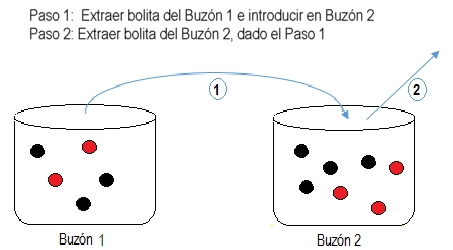

Diagrama de árbol según el experimento

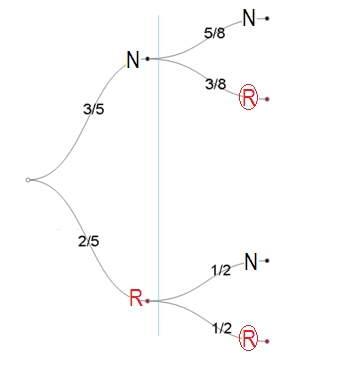

¿Cual es la probabilidad que la bolita del segundo buzón sea roja, si la bolita del primer buzón salió negra?

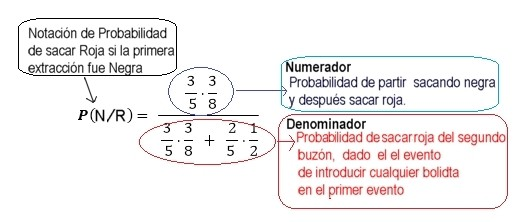

Descripción del Resultado

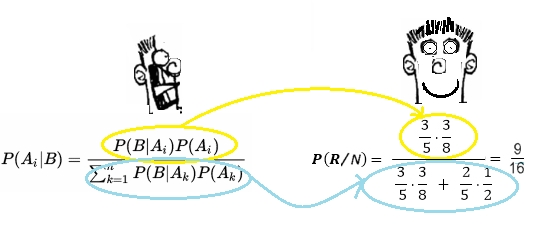

El teormea de Bayes trabaja muy bien al computar la probabilidad de un evento basado en las probabilidades de ciertos eventos relativos.
 
Para mayor información visite [¿Cómo entender el Teorema de Bayes en forma simple?](https://www.docirs.cl/entender_teorema_de_bayes_simple.asp)

### Paso 1.1: Comprendiendo el dataset ### 

Se utilizará el [dataset](http://www.yelp.com/dataset_challenge) del Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015.

Este primer paso es muy importante, no solo está el hecho de obtener un dataset, lo primero es tener claro la visión de lo que se pretende obtener, con ello, buscar el dataset que contenga los datos que permitan obtener la información objetivo. Si es que no es posible utilizar el dataset directamenten con la librería pandas, debemos filtrar el dataset a un formato legible por la librería que estamos utilizando.

 ** Vista de los datos ** 

<img src="imagenes/muestra.png" height="1242" width="1242">

Las columnas no tienen nombre, sin embargo podemos identificar dos.

La primera columna es la opinión del usuario y la segunda es la valoración 1(mensaje positivo) y 0(mensaje negativo)


>** Procedimiento: **
* Se importa el dataset en un dataframe pandas usando el método read_csv. Because this is a tab separated dataset we will be using '\t' as the value for the 'sep' argument which specifies this format. 
* También, se renombra las columnas con una lista ['opinion, 'valor'] a los 'names' como argumento de of read_csv().
* Se imprime los primeros valores del  dataframe con el nombre de las columnas

In [53]:
'''
Procedimiento
'''
import pandas as pd
# Dataset tomado de - http://www.yelp.com/dataset_challenge
df = pd.read_csv('dataset/sentimientos.txt', names=['opinion', 'sentimiento'],sep='\t')
# Output printing out first 5 rows
df.head()

,opinion,sentimiento
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Paso 1.2: Pre-Procesamiento de datos ###

En este caso, no es necesario manejar las entradas para la librería scikit-learn, pues, los valores en el dataset están normalizados a 0 y 1 respectivamente, en la mayoría de casos debemos hacer un preprocesamiento de los datos para que la librería pueda manejarlos.

Es necesario que las comparaciones sean numéricas, ya que al final necesitamos calcular la precisión, recall, entre otros. 

### Paso 2.1: Bolsa de Palabras(BoW) ###

La mayoría de algoritmos son numéricos. En nuestro dataset, como en la mayoría, nos encontraremos con textos.

Bolsa de Palabras, del inglés Bag of Words(BoW), es un término que refiere a problemas en los cuales tenemos un conjunto de palabras, la idea, es tomar parte de este texto y contar la frecuencia de las palabras en ese texto. El orden en el que aparecen no es de interés, solo la frecuencia.

El objetivo es construir una martriz, cada documentos será una fila y cada palabra una columna, con los valores de la frecuencia.

Por ejemplo: 

Si tomamos 4 textos

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Nuestro objetivo es convertir este conjunto de texto a matriz de distribución de frecuencia:


<img src="images/countvectorizer.png" height="542" width="542">

Cada frase pertenece a una fila, y cada palabra a un nombre de la columna, con el valor de la frecuencia que le corresponde a esa frecuencia.



Lets break this down and see how we can do this conversion using a small set of documents.

Se utilizara el método scikit-learn:

[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) 

* Crea un token para la cadena de texto(separa en palabras al texto)It tokenizes the string(separates the string into individual words) y le dá un ID numperico.
* Cuenta la frecuencia de los tokens.

** Tomar nota ** 

* El método CountVectorizer automáticamente convierte las palabras con tokens a minúsculas usando el parámetro `lowercase` que por defecto está en `True`.

* Ignora las puntuaciones. Utiliza el parámetro  `token_pattern`  que tiene una expresión regular que selecciona 2 tokens con caracteres alfanuméricos.

* El tercer parámetro `stop_words`, se refiere a las palabra más comunmente usadas en un lenguaje. Ejemplo: 'de', 'un', 'y', 'el' etc.  En nuestro caso especificaremos el `english`, CountVectorizer ignorará todas las palabras de manera automática del dataset. Es indispensable utilizar los stop words para mejorar los resultados

### Paso 2.2: Implentando BoW desde Cero ###

Antes de usar la librería de BoW scikit-learn, vamos a hacer el proceso para saber como funciona este algoritmo.

**Paso 1: Pasar a minúsculas el texto.**
Se puede utilizar el método lower() de Phyton.

Luego de analizar el dataset, vamos a trabajar con el siguientes opiniones:

```
opiniones = ['Wow... Loved this place.',
             'Crust is not good.',
             'Not tasty and the texture was just nasty.',
             'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.']
```
*Se guardarán los resultados en lower_case_opiniones


In [26]:
opiniones = ['Wow... Loved this place.',
             'Crust is not good.',
             'Not tasty and the texture was just nasty.',
             'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.']

lower_case_opiniones = []
for i in opiniones:
    lower_case_opiniones.append(i.lower())
print(lower_case_opiniones)

['wow... loved this place.', 'crust is not good.', 'not tasty and the texture was just nasty.', 'stopped by during the late may bank holiday off rick steve recommendation and loved it.']


**Paso 1: Remover las puntuaciones.**
Se guardará el resultadno en una lista llamada 'sans_punctuation_documents'

In [27]:
sans_punctuation_opiniones = []
import string

for i in lower_case_opiniones:
    sans_punctuation_opiniones.append(i.translate(str.maketrans('', '', string.punctuation)))
    
print(sans_punctuation_opiniones)

['wow loved this place', 'crust is not good', 'not tasty and the texture was just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it']


**Paso 3: Asignar Tokens**

a. Se separan las palabras de cada opinión usando un delimitador
b. El delimitador identifica el incio y fin de cada palabra (Puede ser un espacio, como es nuestro caso)

El resultado se guardará en 'sans_punctuation_opiniones' utilizando el método split(). Luego el resultado final se almacenará en 'preprocessed_opiniones'.


In [28]:
preprocessed_opiniones = []
for i in sans_punctuation_opiniones:
    preprocessed_opiniones.append(i.split())
print(preprocessed_opiniones)

[['wow', 'loved', 'this', 'place'], ['crust', 'is', 'not', 'good'], ['not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty'], ['stopped', 'by', 'during', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'and', 'loved', 'it']]


**Paso 4: Contar las frecuencias **
a. Se cuenta la ocurrencia de cada cada palabra en cada fila(opinión). Se utilizará el método `Counter` de la librería `collections`.

`Counter` cuenta el número de ocurrencias y retorna un diccionario con las claves del item contado y con el valor de conteo respectivo en la lista. 

Se utiliza el método Counter() y se graba el diccionario en una lista llamada 'frequency_list'.


In [29]:
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_opiniones:
    frequency_list.append(Counter(i))
    
pprint.pprint(frequency_list)

[Counter({'wow': 1, 'loved': 1, 'this': 1, 'place': 1}),
 Counter({'crust': 1, 'is': 1, 'not': 1, 'good': 1}),
 Counter({'not': 1,
          'tasty': 1,
          'and': 1,
          'the': 1,
          'texture': 1,
          'was': 1,
          'just': 1,
          'nasty': 1}),
 Counter({'stopped': 1,
          'by': 1,
          'during': 1,
          'the': 1,
          'late': 1,
          'may': 1,
          'bank': 1,
          'holiday': 1,
          'off': 1,
          'rick': 1,
          'steve': 1,
          'recommendation': 1,
          'and': 1,
          'loved': 1,
          'it': 1})]


Hasta aquí, hemos implementado el proceso Bow. Como se puede observar en la matriz, tenemos cada palabra con la frecuencia respectiva.

Este proceso es realizado de manera automática por el método `sklearn.feature_extraction.text.CountVectorizer`.

A continuación se implementará el método `sklearn.feature_extraction.text.CountVectorizer`.

### Paso 2.3: Implentando BoW con scikit-learn ###

En este paso se implementará directamanet el proceso de scikit-learn, se utilizará el mismo texto que en el caso de la implementaicón manual en el paso anterior.

In [30]:
opiniones = ['Wow... Loved this place.',
             'Crust is not good.',
             'Not tasty and the texture was just nasty.',
             'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.']

Se importa el método sklearn.feature_extraction.text.CountVectorizer y se crea la instancia 'count_vector'. 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

** Preprocesamiento con CountVectorizer() **

En el paso 2.2, se implementó el método CountVectorizer(). En este caso se pasa a minúsculas y se remueven las puntuaciones. CountVectorizer() recibe ciertods parámetros que se esepecifican a continuación:

* `lowercase = True`
    
     `lowercase` tiene asignado `True` por defecto para convertir a minúsculas.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
     `token_pattern` recibe una expresión regular `(?u)\\b\\w\\w+\\b` para eliminnar las puntuaciones.


* `stop_words`

    `stop_words` , esta puesto en `english`, como  se mencionó al inicio de este documento, removerá aquellas palabras que no aportan al análisis, como estamos tratando con opiniones, existirán artículos o palabras gramaticales que generarán ruido..

Se imprime finalmente  `count_vector`:

In [32]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


Se envía el dataset al objeto CountVectorizer creado con el método fit(), luego, se obtiene la lista de palbras categorizadas con el método get_feature_names().

In [33]:
count_vector.fit(opiniones)
count_vector.get_feature_names()

['and',
 'bank',
 'by',
 'crust',
 'during',
 'good',
 'holiday',
 'is',
 'it',
 'just',
 'late',
 'loved',
 'may',
 'nasty',
 'not',
 'off',
 'place',
 'recommendation',
 'rick',
 'steve',
 'stopped',
 'tasty',
 'texture',
 'the',
 'this',
 'was',
 'wow']

`get_feature_names()` nos devuelve los features(palabras), tomadas del dataset de opiniones.

Ahora se crea la matriz de las 4 opiniones, y las columnas que corresponden a cada palabra.
El valor (fila,columna) es la frecuencia de ocurrencia de cada palabra especificada en cada columna, que corresponde a las opiniones en el dataset. Se utiliza el método 'trasnform()' que se le pasa como argumento la matriz 'opiniones'. El método transform() debuelve números enteros numpy, por lo que se convierte a un arreglo utilizando toarray(), se le asigna el nombre doc_array.


In [34]:
doc_array = count_vector.transform(opiniones).toarray()
doc_array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0]], dtype=int64)

A continuación se convierten a un arreglo en un dataframe con el nombre de columnas apropiado, para un mejor tratamiento de los datos.

El arreglo obtenido se carga en 'doc_array', y se combinan con los nombres de las columnas obtenidas con el método get_feature_names(), el resultado de esta operación se almacena en 'frequency_matrix.

In [35]:
frequency_matrix = pd.DataFrame(doc_array, columns=count_vector.get_feature_names())
frequency_matrix

,and,bank,by,crust,during,good,holiday,is,it,just,...,recommendation,rick,steve,stopped,tasty,texture,the,this,was,wow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
3,1,1,1,0,1,0,1,0,1,0,...,1,1,1,1,0,0,1,0,0,0


Hasta el momento, hemos implementado el método Bow con la librería.
Vale la pena recalcar que están incluidas palabras que no aportan de manera positva al análisis, como son, del inglés 'is', 'the', 'an', afectando nuestro análisis.

Existen dos formas de mitigar este problema, como se mencionó con el parámetro `stop_words` y el idioma correspondiente `english`. 

Una segunda opción es utilizar el método [tfidf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer).

### Paso 3.1: Construyendo Training y testing###

Separaremos los datos obtenidos en conjuntos de training y testing, con ello podemos hacer las pruebas de nuestro modelo.

Se utilizará el método train_test_split method de la librería sklearn. Los datos quedarán registrados en las siguientes variables.
* `X_train` datos para training que contendrá la columna de opiniones 'opiniones' .
* `y_train` datos para training tomada de la columna 'sentimiento'.
* `X_test` datos para testing que contendrá la columna de opiniones 'opiniones' .
* `y_test` datos para testing tomada de la columna 'sentimiento'.


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['opinion'], 
                                                    df['sentimiento'], 
                                                    random_state=1)

print('Número total de filas: {}'.format(df.shape[0]))
print('Número total de filas del conjunto training: {}'.format(X_train.shape[0]))
print('Número total de filas del conjunto test: {}'.format(X_test.shape[0]))

Número total de filas: 1000
Número total de filas del conjunto training: 750
Número total de filas del conjunto test: 250


### Paso 3.2: Aplicando el procesamiento Bag of Words a nuestros datos. ###

Una vez separados los datos, el siguiente proceso es aplicar lo implementado en el paso 2 (Bow), y formatear en una matriz los datos. Se utilizará el objeto CountVectorizer() tal cual el paso previo. 

Se deben considerar 2 pasos:

* Primero, tratar los datos de training(`X_train`) en `CountVectorizer()` y tomar la matriz.
* Segundo, transformar los datos de test (`X_test`) y tomar la matriz. 

    `X_train` son los datos de la columna 'opinion' que se utilizará para el entrenamiento de nuesro modelo. 

    `X_test` son los datos de la columna 'opinion' que se utilizarán en el futuro apara realizar las predicciones. Luego se compararán los resultados con los datos obtenidos en  `y_test` en un paso posterior. 

In [40]:
'''
El código para este segmento está en 2 partes. 
Primero, se está aprendiendo un diccionario para los datos de training Luego se transforman en una matris opiniones-term;
Segundo, para los datos de testing se transforman los datos de opiniones-term.

Similar al paso 2.3

'''

'\nEl código para este segmento está en 2 partes. \nPrimero, se está aprendiendo un diccionario para los datos de training Luego se transforman en una matris opiniones-term;\nSegundo, para los datos de testing se transforman los datos de opiniones-term.\n\nSimilar al paso 2.3\n\n'

In [41]:
# Instanciar el método CountVectorizer
count_vector = CountVectorizer()

# Tratar los datdos de training y tomar la matriz
training_data = count_vector.fit_transform(X_train)

# Tratar los datdos de testing y tomar la matriz.
testing_data = count_vector.transform(X_test)


### 4.1: Implementación del teorema de Bayes desde cero ###

Con los datos formateados de nuestro dataset, podemos proseguir con las predicciones para clasificar las opiniones como positivas(like) o negativas(dislike). El teorema de Bayes calcula la probabilidad de un evento que ocurre, en base a ciertas probabilidades de otro eventos rellacionados. El pundo de partida son las probabilidades que tenemos, y luego las propabbilidades calculadas en base a las primeras.

Por ejemplo: si tratamos de identificar la probabilidade de que una persona tenga Diabetes. Asumimos lo siguiente
`P(D)` es la probabilidad de que una persona tiene Diabetes.

Su valor es de `0.01` (1%) del valor general

`P(Pos)` es la probabilidad de obtener un resultado positivo.

`P(Neg)` es la probabilidad de obtener un resultado negativo.

`P(Pos|D)`  es la probabilidad de obtener un resultado positivo dado que la persona tiene diabetes.
Este valor es de `0.9` (90%), también se le conoce como la Sensitividad o RAtio Verdadero Positivo

`P(Neg|~D)` es la probabilidad de obtener un resultado negativo dado que la persona No tiene diabetes.
Este valor también es de `0.9` (90%), también se le conoce como la Especificidad o RAtio Verdadero Negativo

La fórmula de Bayes es entonces:

<img src="images/bayes_formula.png" height="242" width="242">

* `P(A)`  es la propbaiblidad inicial de un evento A independiente. En nuestro ejemplo `P(D)`. Es un valor que se nos da.

* `P(B)`  es la propbaiblidad inicial de un evento B independiente. En nuestro ejemplo `P(Pos)`.

* `P(A|B)` es la probabilidade posterior de A dado que ocurrió B. En nuestro ejemplo, `P(D|Pos)`. 
**La probabilidad de que un individuo tenga Diabetes, dado que, el individuo tiene un resultado positivo. Es el valor que queremos calcular.**

* `P(B|A)` es la probabilidad e que ocurra B, dado que se dió A. En nuestro ejemplo  `P(Pos|D)`. Es un valor que se nos da.

Colocamos los valores en la fórmulad e Bayes:


`P(D|Pos) = P(D) * P(Pos|D) / P(Pos)`

La probabilidad de obtener un resultado positivo `P(Pos)` puede calcularse usando la sensitividad y Especificidad como sigue:

`P(Pos) = [P(D) * sensitividad] + [P(~D) * (1-Especificidad))]`


Calculamos la probabilidad de obtener un resultado positivo

In [51]:
# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 0.99

# Sensitivity or P(Pos|D)
p_pos_diabetes = 0.9

# Specificity or P(Neg|~D)
p_neg_no_diabetes = 0.9

# P(Pos)
p_pos = (p_diabetes * p_pos_diabetes) + (p_no_diabetes * (1 - p_neg_no_diabetes))# TODO
print('La probabilidad de obtener un resultado Positivo es P(Pos) is: {}',format(p_pos))

La probabilidad de obtener un resultado Positivo es P(Pos) is: {} 0.10799999999999998


**Ahora con la información podemos calcular resultados posteriores**

La probabilidad de que un individuo que tiene diabete, dado que, tiene un resultado positivo es:

`P(D|Pos) = (P(D) * Sensitivity)) / P(Pos)`

La probabilidad de que un individuo que No tiene diabete, dado que, tiene un resultado positivo es:


`P(~D|Pos) = (P(~D) * (1-Specificity)) / P(Pos)`

La suma, debe ser  `1`. 

'''
Calculamos la probabilidad de que un individuo que tiene diabetes, dado que, ese individuo tiene un resultado positivo. 
 P(D|Pos).

La fórmula es: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)
'''

In [44]:

p_diabetes_pos = (p_diabetes * p_pos_diabetes) / p_pos # TODO
print('La probabilidad de que un individuo que tiene diabets, dado que tiene un resultado positivo es:\
',format(p_diabetes_pos)) 

La probabilidad de que un individuo que tiene diabets, dado que tiene un resultado positivo es: 0.08333333333333336


Calculamos ahora la probabilidad de un individuo que no tiene diabetes, dado que, ese individuo tiene un resultado positivo
 P(~D|Pos).

La fórmula es: P(~D|Pos) = P(~D) * P(Pos|~D) / P(Pos)

P(Pos|~D) puede determinarse como 1 - P(Neg|~D). 

Entonces:
P(Pos|~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1

In [45]:
p_pos_no_diabetes = 0.1

# P(~D|Pos)
p_no_diabetes_pos = (p_no_diabetes * p_pos_no_diabetes) / p_pos
print ('la probabilidad de un individuo que no tiene diabetes, dado que, ese individuo tiene un resultado positivo:'\
,p_no_diabetes_pos)

la probabilidad de un individuo que no tiene diabetes, dado que, ese individuo tiene un resultado positivo: 0.9166666666666669


Hemos implementado el teorema de Bayes. Hemos demostrado que, si se obtiene un resultado positivo, solo hay el 8,3% de que la persona tiene diabetes y un 91,67% de que no tiene diabetes. Asumiendo de que solo el 1% de la población tiene diabetes.

** ¿De donde procede 'Naive' en 'Naive Bayes'?** 

El término 'Naive' en Naive Bayes viene del hecho que el algoritmo considera las características que se utilizan para realizar las predicciones independiente una de otra, no siempre es asi. Naive es una extensión de Bayes que asume que todas las características son independientes.
 

### Paso 4.2: Implementación de Naive Bayes desde cero ###



Consideraremos más de una variable

quedando de la siguiente manera:

<img src="images/naivebayes.png" height="342" width="342">

 `y` es el candidato  y `x1` a `xn` son los features.

### Paso 5: Implementando Naive Bayes usando scikit-learn ###

Sklearn tiene varias implementaciones de Naive Bayes que podemos utilizar. Utilizaremos el método `sklearn.naive_bayes` para hacer las predicciones de nuestro dataset.

Especificacmente, se utilizará la implementacion multinomial Naive Bayes. Factible con variables discreta (en nuestro caso, el conteo de palabras para clasificar el texo). Toma como entrada un número entero que representa el conteo de una palabra. Naive Bayes Gauseano es mejor para variable sontinuas con una distribución normal.

Recordemos que se ha cargado los datos de  training en 'training_data'y los de testing en 'testing_data'.

Importamos el clasificador MultinomialNB, se moldean los datos de entreganimeinto usando fit(). Se nombra el clasificador
Import the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier
'naive_bayes'. Se entrena´ra utilizando 'training_data' y y_train'. 
'''

In [52]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Ahora que hemos entrenado nuestro algoritmo usando training_data, podemos realizar predicciones en 'testing_data' utilizando predict(). Guardamos las predicciones en la variable 'predictions'.

In [48]:
predictions = naive_bayes.predict(testing_data)

Ahora que tenemos las predicciones en nuestro arreglo test, necesitamos calcular el acuuracy de nuestras predicciones.

### Paso 6: Evaluación de nuestro modelo ###

Ahora que tenemos las predicciones en nuestro test, debemos evaluar nuestro modelo. 

** Accuracy ** mide cuan frecuente nuestro clasificador hace una preción correcta. Es el número de predicciones correctas del total del número de predicciones


** Precision ** nos dice la proporción de opiniones que clasificamos como negativas, y que realmente lo son.
Es un ratio de verdaderos positivos

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** nos muestra la proporcion de mensajes que actualmente son negativos de los negativos. 
Es el ratio de los verdaderos positivos, con respecto a los que realmente son:

`[True Positives/(True Positives + False Negatives)]`
En nuestro caso, si tenemos 100 opiniones y solo 2 fueron negativos,  los 98 no lo fueron, el accuracy no es una métrica efectiva. Podemos clasificar 90 mensajes positivos (incluyendo los 2 que fueron negativos, pero los clasificamos como positivos) y 10 como negativos (todos los 10 son falsos positivos) pudiendose obtener un buen porcentaje de accuracy. Para este caso precision y recall nos ayudan. Estas métricas pueden combinarse para obtener el score F1, que es un promedio entre la presición y recall, entre 0 a 1, donde uno es el mejor F1.

Usaremos 4 métricas para asegurar que nuestro model trabaja bien. Valores entre 0 a 1, mientras más se acerquen a uno, será mejor nuestro modelo.

Se calculará el accuracy, precision, recall and F1  de nuestro modelo utilizando los datos de test 'y_test' and las predicciones, en la variable 'predictions'.

In [50]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', format(accuracy_score(y_test, predictions)))
print('Precision : ', format(precision_score(y_test, predictions)))
print('Recall : ', format(recall_score(y_test, predictions)))
print('F1 : ', format(f1_score(y_test, predictions)))

Accuracy:  0.768
Precision :  0.7457627118644068
Recall :  0.7586206896551724
F1 :  0.752136752136752


### Paso 7: Conclusiones ###

Cuando nesecitamos realizar operaciones de clasificación, Naive Bayes nos permite utilizar varios features. En nuestro caso, cada palabra fué tratada como feature, y existen miles de palabras diferentes. Si quitamos las palabras de parada, los resultados mejoran mucho. Otra ventaja es la simplicidad. Es un algoritmo rápido y las predicciones obtenidas son buenas.

En la primera prueba obtuvimos:
Accuracy:  0.768
Precision :  0.7457627118644068
Recall :  0.7586206896551724
F1 :  0.752136752136752

Quitando las palabras de parada...

Sería interesante utilizar este algoritmo con un dataset mucho más grande y comparar resultados.